# Задача прогнозирования инсульта

## Описание:

Инсульт – это острое нарушение мозгового кровообращения, вызывающее стремительное развитие очаговой и/или общемозговой неврологической симптоматики.
Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе различных входных параметров, таких как пол, возраст, сопутствующие заболевания и т.д. 

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
    
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',', header=0,  engine='python')
type(data)

pandas.core.frame.DataFrame

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Описание признаков:

1. id - уникальный идентификатор;
2. gender - пол пациента ('Female', 'Male', 'Other')
3. age - возраст пациента;
4. hypertension - наличие гипертония (1 - есть, 0 - нет);
5. heart_disease - наличие сердечных заболеваний (1 - есть, 0 - нет);
6. ever_married - состоял ли человек в браке;
7. work_type - занятость ( "children" - ребенок, "Govt_job" - работа на государство, "Never_worked" - никогда не работал, "Private" - частный или "Self-employed" - самозанятый);
8. residence_type - тип проживания ("Rural" - сельский или "Urban" - городской);
9. avg_glucose_level - уровень глюкозы в крови;
10. bmi - индекс массы тела;
11. smoking_status - курение ("formerly smoked" - ранее курил, "never smoked" - никогда не курил, "smokes" - курит или "Unknown" - неизвестно);
12. stroke - инсульт (1 - да, 0 - нет).

Удалим id из нашей таблицы:

In [4]:
data=data.drop('id', axis=1)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.shape

(5110, 11)

В нашем датасете данные о 5510 пациентах с 11 признаками

## Заполнение пропущенных значений и обработка выбросов

In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


По таблице видно, что в численном признаке bmi отсутствуют некоторые значения. 

In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Других пропущенных значений нет. Заполним недостующие элементы медианой:

In [9]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Мы избавились от пропущенных значений

Ясно, что риск возникновения инсульта увеличивается с возрастом, поэтому рассмотрим эту зависимость.

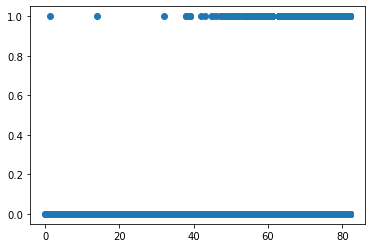

In [10]:
plt.scatter(data['age'], data['stroke'])
pass

Из построеннной диаграммы видно, что бОльшая часть точек тех, у кого было инсульт, находится после 30 лет. Остальные значения  этом случае будем считать выбросами и удалим их:

In [11]:
data.loc[(data['age'] <=30) & (data['stroke'] ==1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.1,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [12]:
data = data.drop(data[(data['age'] <=30) & (data['stroke'] ==1)].index)

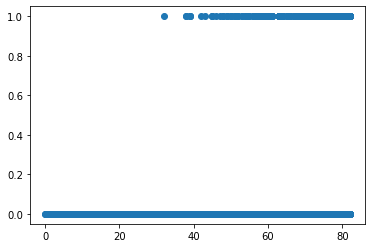

In [13]:
plt.scatter(data['age'], data['stroke'])
pass

Теперь все хорошо

## Визуализация данных

Для более наглядной визуализации построим матрицу и диаграмму корреляции:

In [14]:
corr_mat = data.corr()
corr_mat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276339,0.263784,0.237775,0.324492,0.249056
hypertension,0.276339,1.000000,0.108279,0.174388,0.158308,0.128969
heart_disease,0.263784,0.108279,1.000000,0.161800,0.036924,0.135849
avg_glucose_level,0.237775,0.174388,0.161800,1.000000,0.166946,0.134086
bmi,0.324492,0.158308,0.036924,0.166946,1.000000,0.036105
stroke,0.249056,0.128969,0.135849,0.134086,0.036105,1.000000


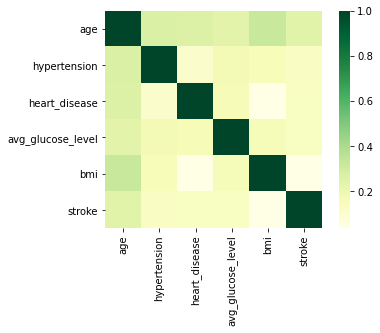

In [15]:
sns.heatmap(corr_mat, square=True, cmap='YlGn')
pass

Из полученных данных видно, что наибольшая корреляция для инсульта наблюдается с паре возрастом, что логично.
В целом, явно выделяющейся зависимости для каких-либо признаков не наблюдается (разве что индекс массы тела и возраст)

Рассмотрим отдельно зависимость возраста и возниконовения инсульта

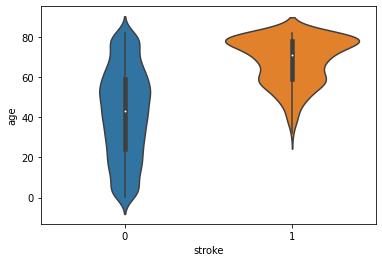

In [16]:
sns.violinplot(x="stroke", y="age", data=data)
pass

На данном графике показана плотность распределения возраста относительно наличия заболевания. На втором скрипичном графике наблюдается два пика: в ~60 и ~80 лет. Также видно, что вероятность возникновения инсульта больше в пожилом возрасте

Посмотрим на количество элементов каждого класса:

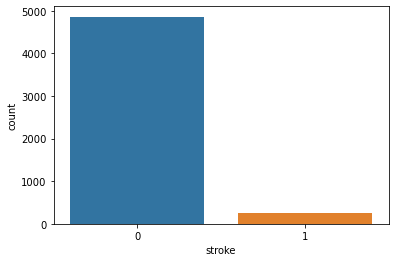

In [17]:
sns.countplot(x='stroke', data=data)
pass

По графикам видно, что классы разнородны

## Категориальные признаки

In [18]:
data.describe(include = ['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5108,5108,5108,5108,5108
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2992,3353,2925,2595,1892


Рассмотрим наглядно некоторые значения:

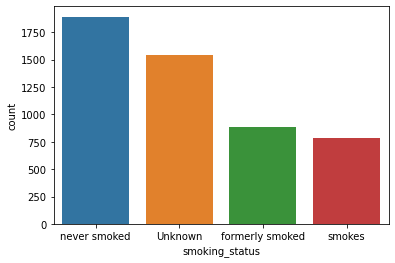

In [19]:
sns.countplot(x='smoking_status', order=data['smoking_status'].value_counts().index, data=data)
pass

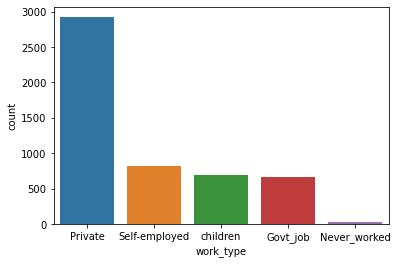

In [20]:
sns.countplot(x='work_type', order=data['work_type'].value_counts().index, data=data)
pass

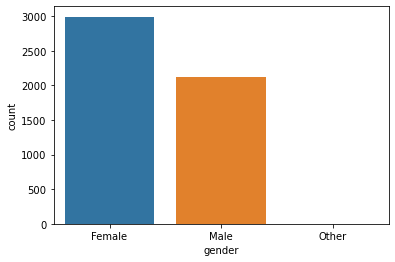

In [21]:
sns.countplot(x='gender', order=data['gender'].value_counts().index, data=data)
pass

In [22]:
data['gender'].value_counts()

Female    2992
Male      2115
Other        1
Name: gender, dtype: int64

Заменим единственно встречающееся значение Other модой - т.е поменяем на Female

In [23]:
data.loc[data['gender']=='Other','gender']='Female' 

In [24]:
data['gender'].value_counts()

Female    2993
Male      2115
Name: gender, dtype: int64

## Бинаризация 

Замена бинарных признаков <font color='red'>'gender', 'ever_married' и 'Residence_type'</font> на числовые:

In [25]:
data.loc[data['gender'] == 'Female', 'gender'] = 1
data.loc[data['gender'] == 'Male', 'gender'] = 0
data['gender'].describe()

count     5108
unique       2
top          1
freq      2993
Name: gender, dtype: int64

In [26]:
data.loc[data['ever_married'] == 'Yes', 'ever_married'] = 1
data.loc[data['ever_married'] == 'No', 'ever_married'] = 0
data['ever_married'].describe()

count     5108
unique       2
top          1
freq      3353
Name: ever_married, dtype: int64

In [27]:
data.loc[data['Residence_type'] == 'Rural', 'Residence_type'] = 1
data.loc[data['Residence_type'] == 'Urban', 'Residence_type'] = 0
data['Residence_type'].describe()

count     5108
unique       2
top          0
freq      2595
Name: Residence_type, dtype: int64

К категориальным (небинарным) признакам <font color='red'>'work_type' 'smoking_status'</font> применим метод бинаризации 

In [28]:
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'])
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,83.75,28.1,0,0,0,1,0,0,0,0,1,0
5106,1,81.0,0,0,1,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,1,35.0,0,0,1,1,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,1,1,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [29]:
data.shape

(5108, 18)

## Нормализация количественных признаков

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [30]:
numerical_columns = ['age', 'avg_glucose_level','bmi']
data_numerical=data[numerical_columns]
data_numerical.describe()

,age,avg_glucose_level,bmi
count,5108.000000,5108.000000,5108.000000
mean,43.240540,106.164121,28.861785
std,22.605767,45.284630,7.701010
min,0.080000,55.120000,10.300000
25%,25.000000,77.275000,23.800000
50%,45.000000,91.890000,28.100000
75%,61.000000,114.107500,32.800000
max,82.000000,271.740000,97.600000


In [31]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,avg_glucose_level,bmi
count,5.108000e+03,5.108000e+03,5.108000e+03
mean,-1.187286e-15,3.775410e-15,-1.050130e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.909271e+00,-1.127184e+00,-2.410305e+00
25%,-8.068976e-01,-6.379454e-01,-6.572885e-01
50%,7.783234e-02,-3.152090e-01,-9.892020e-02
75%,7.856163e-01,1.754100e-01,5.113894e-01
max,1.714583e+00,3.656337e+00,8.925870e+00


Итоговая таблица:

In [32]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,43.240540,0.097494,0.054033,106.164121,28.861785,0.048356,0.128622,0.004307,0.572631,0.160337,0.134103,0.301879,0.173258,0.370399,0.154464
std,22.605767,0.296658,0.226105,45.284630,7.701010,0.214537,0.334814,0.065492,0.494745,0.366954,0.340797,0.459118,0.378507,0.482959,0.361428
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.275000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.890000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.107500,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разбиение данных

In [33]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

Будем использовать все входные признаки

In [34]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

Разобьем данные на обучающую и тестовую выборки - 70% и 30%

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3575, 1533)

## KNN (классификатор ближайших соседей)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.04363636363636364
err_test:  0.06327462491846053


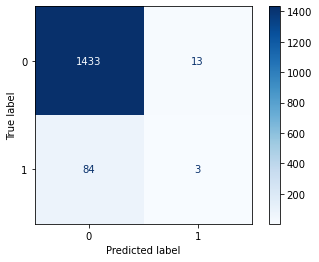

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

В нашем случае получилась высокая вероятность ошибки 2-го рода: ML-модель предсказала отрицательный результат, но на самом деле он положительный. На это могла повлиять несбалансированность класса: пациентов без инсульта значительно больше.

Подберем оптимальный параметр n_neighbors

In [38]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("best_cv_err: ", best_cv_err)
print("best_n_neighbors: ", best_n_neighbors)

best_cv_err:  0.04447522025569994
best_n_neighbors:  10


In [39]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.044475524475524476
err_test:  0.05740378343118069


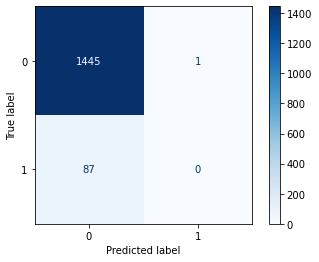

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

При выборе оптимального параметра n_neighbors=20 по сравнению с n_neighbors = 5 ошибка на тестовой выборке 
уменьшилась на ~9.2%. При этом возросла ошибка на обучающей выборке.


## SVC (метод опорных векторов)

In [41]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.03944055944055944
err_test:  0.05675146771037182


## Random Forest

In [42]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.0
err_test:  0.05675146771037182


## Выводы

Была рассмотрена задача классификации с последующей обработкой и визуализацией значений. При решении задачи обработаны пропущенные значения и некоторые выбросы, показана разнородность классов, применены различные алгоритмы для классификации.
С оптимальным параметром метод KNN показал ошибку на тестовой выборке в ~5.7%. Метод опорных векторов дал меньшие ошибки и на тестовой выборке, и на обучающей. 
Random Forest продемонстировал нулевую ошибку на обучающей выборке и чуть большую на тестовой.